<a href="https://colab.research.google.com/github/shoaibrayeen/CNN-Applications/blob/master/Object%20Classification/ObjectClassification_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mount drive to access dataset


*   [click](https://drive.google.com/drive/folders/10Uqr_lQUgamXQs5Z43PKwwuCRx6hG52b?usp=sharing) here to see the furniture dataset in drive
*   create shortcut to the My Drive folder
*   Run the below code to access from drive and upload to session storage







In [1]:
from google.colab import drive
from pathlib import Path
drive.mount("/gdrive", force_remount=True)


Mounted at /gdrive


In [2]:
%load_ext autoreload
%autoreload 2

import sys

from pathlib import Path
base = Path('/gdrive/My Drive/furniture-images/img/')
sys.path.append(str(base))

In [3]:
zip_path = base/'furniture-images.zip'
!cp "{zip_path}" .
!unzip -q furniture-images.zip
!rm furniture-images.zip

### Import Libraries



In [4]:
import tensorflow as tf

import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.applications.inception_v3 import preprocess_input

import os
import random

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

### Access the downloaded dataset in the colab
Access the dataset directories and images

In [5]:
base_dir = 'furniture-images/img'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
category = os.listdir(train_dir)
print(category)

['chair', 'swivelchair', 'bed', 'sofa', 'table']


In [6]:

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 1
ncols = 8

# Index for iterating over images
pic_index = 0

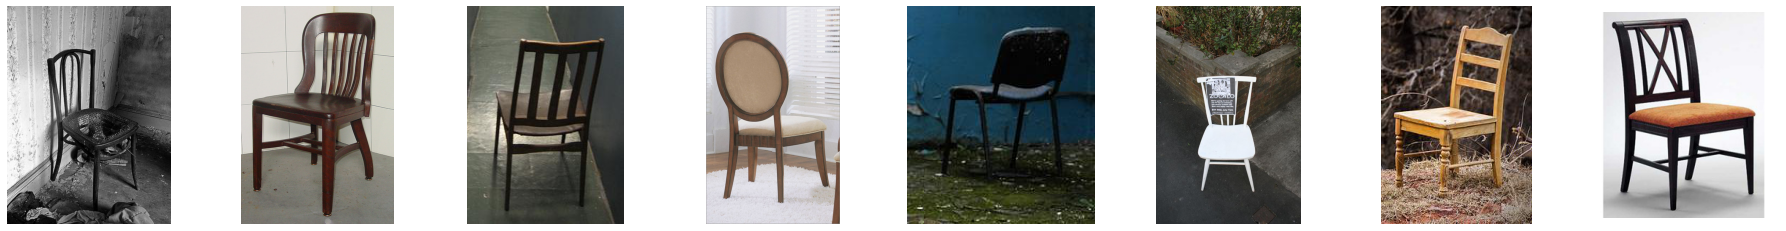

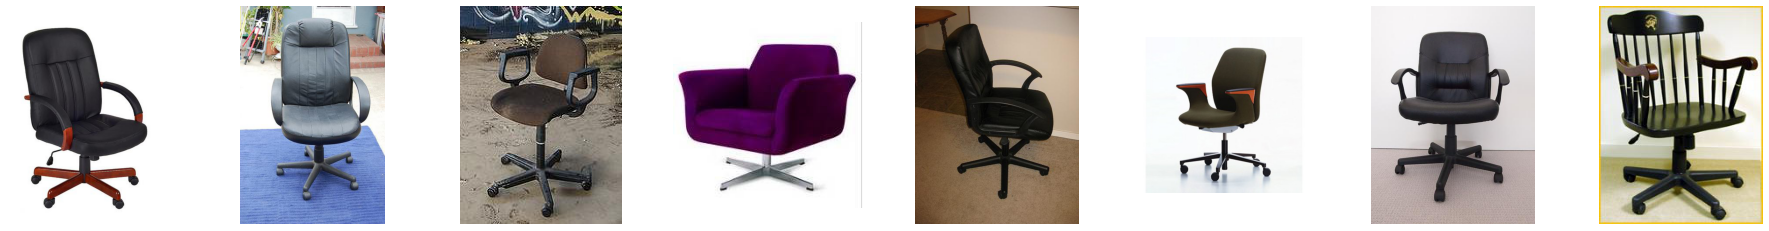

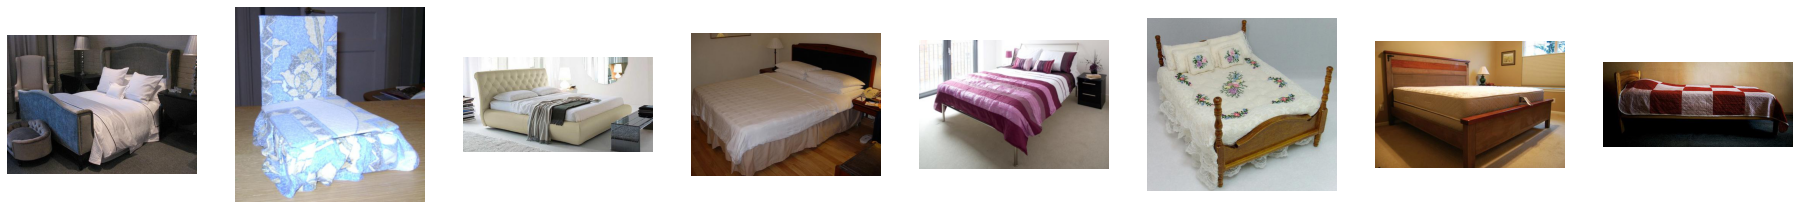

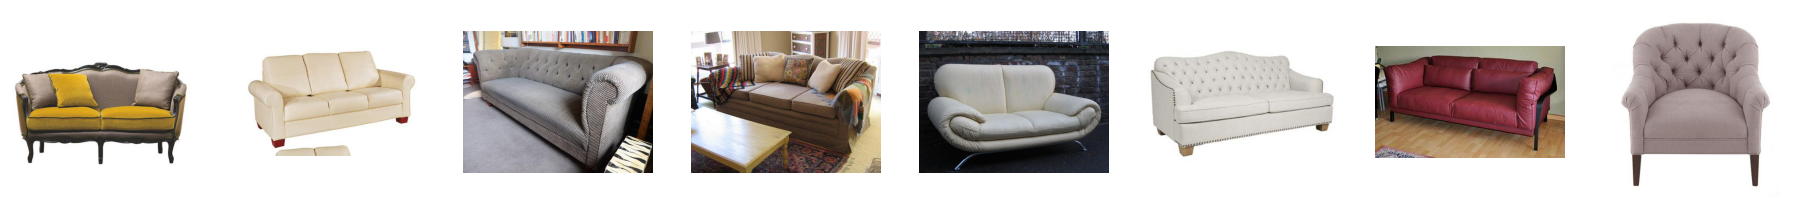

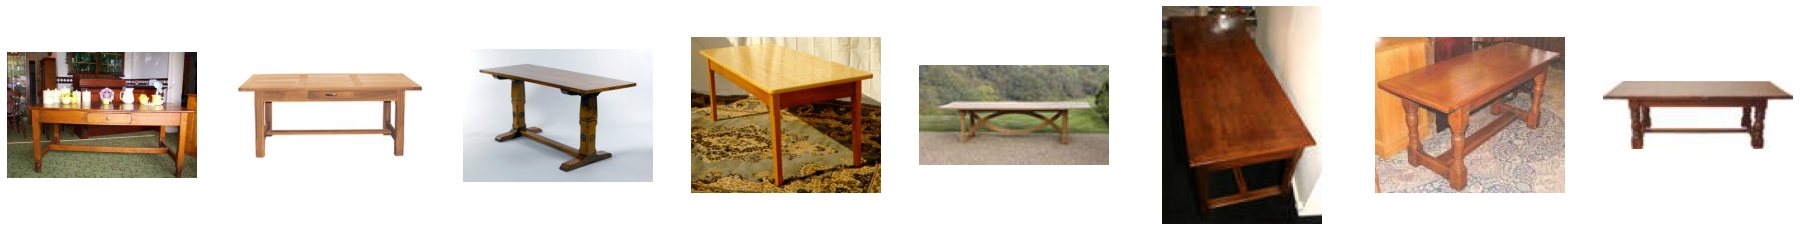

In [7]:


pic_index += 8

for it in category:
  # Set up matplotlib fig, and size it to fit 4x4 pics
  fig = plt.gcf()
  fig.set_size_inches(ncols * 4, nrows * 4)
  train_cat_dir = os.path.join(train_dir, it)
  train_cat_fnames = os.listdir(train_cat_dir)
  next_pix = [os.path.join(train_cat_dir, fname) 
                  for fname in train_cat_fnames[pic_index-8:pic_index]]

  for i, img_path in enumerate(next_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

  plt.show()

In [8]:
train_files = sum([len(files) for i, j, files in os.walk(train_dir)])
val_files = sum([len(files) for i, j, files in os.walk(val_dir)])
print(train_files, val_files)

4024 423


Set the hyperparameters

In [9]:

n_classes = 5
epochs = 30
nb_train_samples = train_files
nb_validation_samples = val_files
num_epochs = epochs



img_width, img_height = 160, 160
train_data_dir = train_dir
validation_data_dir = val_dir
batch_size = 24



In [10]:
from tensorflow.keras.applications.vgg16 import VGG16

pre_trained_model = VGG16(input_shape=(img_width, img_height, 3), include_top=False, weights='imagenet', classifier_activation='softmax')

pre_trained_model.summary()


58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 160, 160, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 160, 160, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 80, 80, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 80, 80, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 80, 80, 128)       147584    
                                                              

In [11]:
for layer in pre_trained_model.layers:
    layer.trainable = False
    
last_layer = pre_trained_model.get_layer('block5_pool')
print('Last layer output shape :', last_layer.output_shape)
last_output = last_layer.output

Last layer output shape : (None, 5, 5, 512)


In [12]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(last_output)

x = layers.Dropout(0.2)(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
output = layers.Dense(5, activation='softmax')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(pre_trained_model.input, output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 160, 160, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 160, 160, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 80, 80, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 80, 80, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 80, 80, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 40, 40, 128)       0     

### Print model summary Plot the model architecture
Model architecture (model_plot.png image) is saved in the root folder of the session by running the below code.

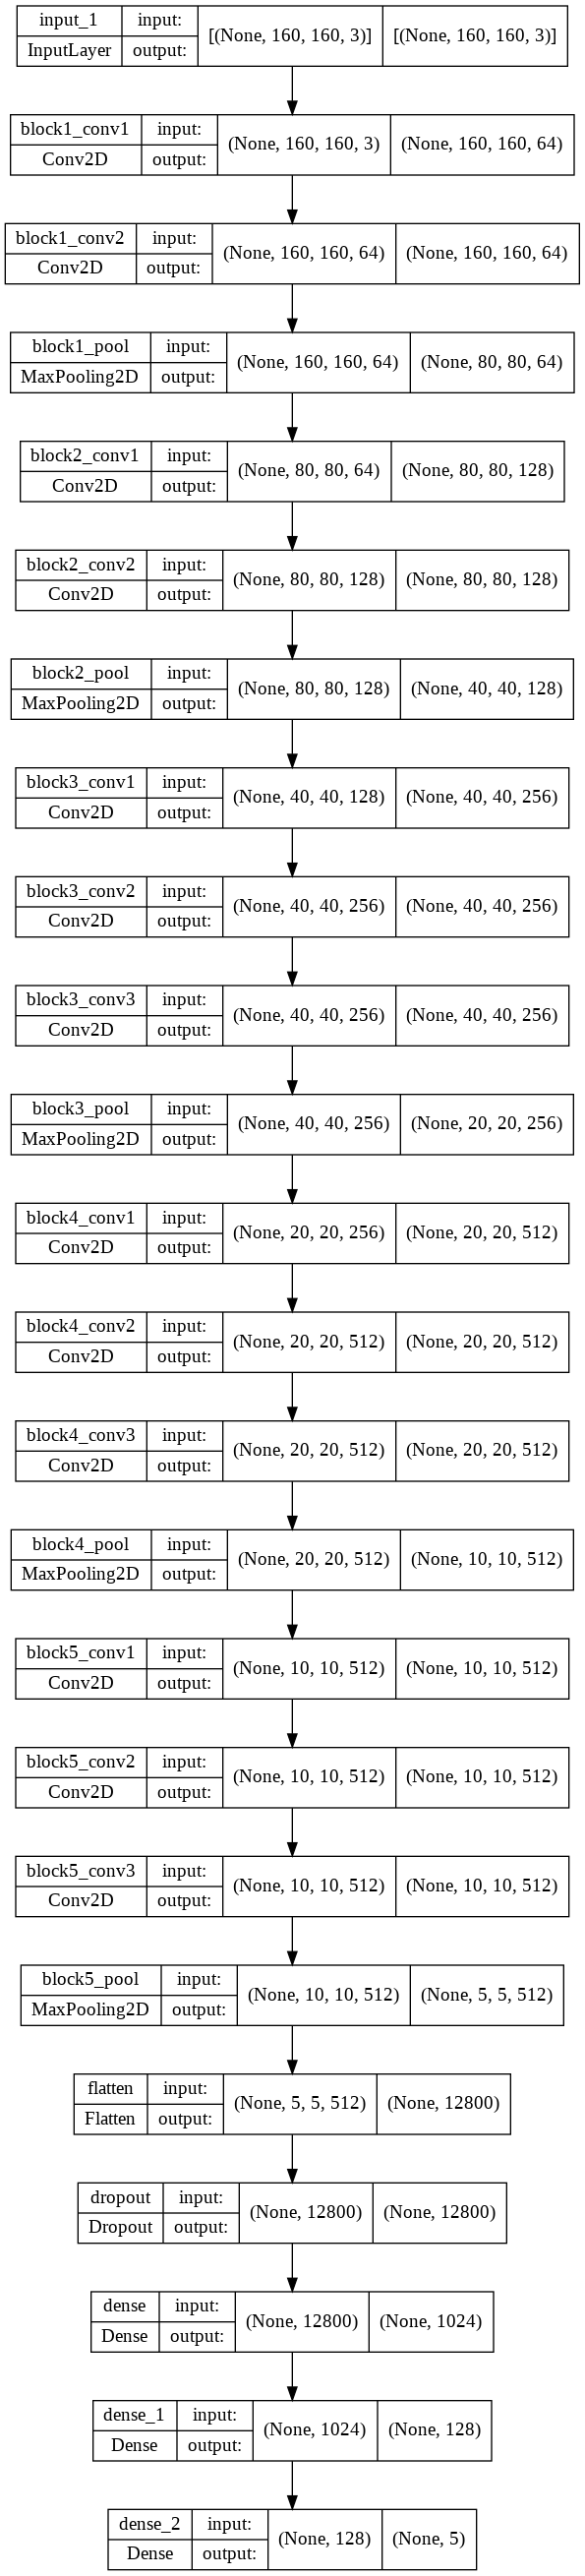

In [13]:

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [14]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 160, 160, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 160, 160, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 80, 80, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 80, 80, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 80, 80, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 40, 40, 128)       0     

### Run the model

In [15]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


Found 4024 images belonging to 5 classes.
Found 423 images belonging to 5 classes.


In [17]:
history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=num_epochs,
                    verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
167/167 [==============================] - 50s 225ms/step - loss: 0.3825 - accuracy: 0.8953 - val_loss: 0.2283 - val_accuracy: 0.9240
Epoch 2/30
167/167 [==============================] - 37s 223ms/step - loss: 0.1182 - accuracy: 0.9605 - val_loss: 0.1757 - val_accuracy: 0.9412
Epoch 3/30
167/167 [==============================] - 37s 221ms/step - loss: 0.0864 - accuracy: 0.9715 - val_loss: 0.2211 - val_accuracy: 0.9436
Epoch 4/30
167/167 [==============================] - 37s 219ms/step - loss: 0.0664 - accuracy: 0.9797 - val_loss: 0.1273 - val_accuracy: 0.9387
Epoch 5/30
167/167 [==============================] - 37s 221ms/step - loss: 0.0572 - accuracy: 0.9793 - val_loss: 0.1722 - val_accuracy: 0.9436
Epoch 6/30
167/167 [==============================] - 37s 219ms/step - loss: 0.0565 - accuracy: 0.9787 - val_loss: 0.1399 - val_accuracy: 0.9608
Epoch 7/30
167/167 [==============================] - 37s 220ms/step - loss: 0.0464 - accuracy: 0.9840 - val_loss: 0.1077 - val_ac

### Plot the Results
Show the accuracy and loss variations per epoch in the graph

In [18]:
print("===========Model -> Confidence Interval=========")
import scipy.stats as st

def compute_confidence_interval(data, title):
  # Alpha -> Level of Significance
  confidence_interval = st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))
  print('Confidence Interval of ' + title + ' -> ' + '(%.5f' % confidence_interval[0] + ', ' + '%.5f' % confidence_interval[1] + ')')

compute_confidence_interval(history.history['accuracy'], 'Accuracy')
compute_confidence_interval(history.history['val_accuracy'], 'Validation Accuracy')
compute_confidence_interval(history.history['loss'], 'Loss')
compute_confidence_interval(history.history['val_loss'], 'Validation Loss')

===========Model -> Confidence Interval=========
Confidence Interval of Accuracy -> (0.97730, 0.99098)
Confidence Interval of Validation Accuracy -> (0.94586, 0.95463)
Confidence Interval of Loss -> (0.02475, 0.07451)
Confidence Interval of Validation Loss -> (0.16075, 0.19905)


In [19]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix

def my_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred,average='weighted')
    f1Score = f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy : " + '%.5f' % accuracy)
    print("Precision : " + '%.5f' % precision)
    print("f1Score : " + '%.5f' % f1Score)
    print("=========Confusion Matrix===========");
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

In [24]:
print("==============Summary -> Validation Dataset============")
test_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False) 
predictions = model.predict(test_generator, verbose=1)
yPredictions = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

testAcc, testPrec, testFScore = my_metrics(true_classes, yPredictions)
MODEL_FILENAME = base_dir + "model_cv.h5"

model.save(MODEL_FILENAME)

==============Summary -> Validation Dataset============
Found 423 images belonging to 5 classes.
18/18 [==============================] - 2s 96ms/step
Accuracy : 0.95508
Precision : 0.95692
f1Score : 0.95517
=========Confusion Matrix===========
[[98  1  1  0  0]
 [ 1 98  0  1  0]
 [ 6  0 94  0  0]
 [ 1  6  0 92  1]
 [ 0  1  0  0 22]]


In [22]:
#Show Model Stats

def find_model_stats(stats, title):
  min_val = min(stats)
  max_val = max(stats)
  avg_val = (min_val + max_val)/2
  diff = max_val - avg_val
  print(title + ' -> %.3f' % avg_val + ' +- ' + '%.6f' % diff)

print("============Training Model Stats=================")
find_model_stats(history.history['accuracy'], 'Accuracy')
find_model_stats(history.history['val_accuracy'], 'Validation Accuracy')
find_model_stats(history.history['loss'], 'Loss')
find_model_stats(history.history['val_loss'], 'Validation Loss')

============Training Model Stats=================
Accuracy -> 0.945 +- 0.050000
Validation Accuracy -> 0.945 +- 0.020833
Loss -> 0.197 +- 0.185418
Validation Loss -> 0.219 +- 0.111194


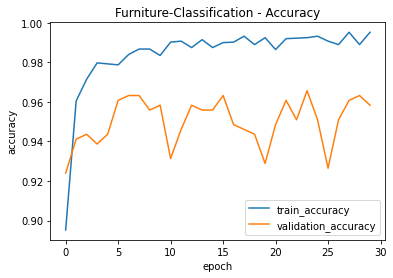

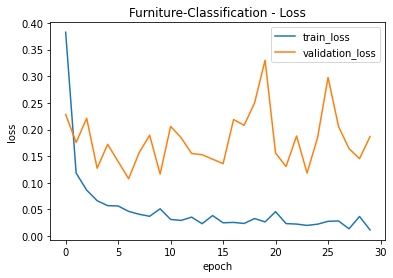

In [23]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()


def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()


plot_accuracy(history,'Furniture-Classification - Accuracy')
plot_loss(history,'Furniture-Classification - Loss')